# **Financial Stock Price Prediction**

**Overview:**

The goal of this project is to predict future stock prices using time series forecasting techniques. Stock price prediction is a challenging problem, as financial markets are influenced by a multitude of factors.

 __Table of Contents__

 <ol>
    <li>
        <a href="#Libraries">Importing Required Libraries</a>
    </li>
    <li>
        <a href="#Data Exploration">Data Exploration</a>
        <ol>
            <li><a href="#Checking Null Values">Checking Null Values</a></li>
            <li><a href="#Checking Duplicates Values">Checking Duplicates Value</a></li>
            <li><a href="#Statistic Summary">Statistic Summary</a></li>
            <li><a href="#Data Visualisation">Data Visualisation</a></li>
            <li><a href="#Correlation">Correlation</a></li>
            <li><a href="#Daily Return Of The Stock On Average">Daily Return Of The Stock On Average</a></li>
            <li><a href="#Risks">Risks</a></li>
        </ol>
    </li>
    <li>
        <a href="#Model Selection">Model Selection</a>
        <ol>
            <li><a href="#Perform Stock Test">Perform Stock Test</a></li>
            <li><a href="#ARIMA">ARIMA</a></li>
            <li><a href="#LSTM">LSTM</a></li>
        </ol>
    </li>
    
</ol>

# Libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from pmdarima import auto_arima
from pmdarima.arima import ADFTest
from sklearn.model_selection import train_test_split
import plotly.graph_objs as go
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
companies = ["AAPL", "MSFT", "GOOG","NVDA"]
stock_data = yf.download(companies, start="2010-01-01", end="2023-01-01")

C:\Users\HP\AppData\Local\Temp\ipykernel_832\1933032400.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(companies, start="2010-01-01", end="2023-01-01")
[*********************100%***********************]  4 of 4 completed


# Data Exploration

# Showing Our Dataset Shape

In [3]:
stock_data.shape

(3272, 20)

#  Checking For Null Values

In [4]:
stock_data.isna().sum().sum()

0

# Checking Duplicates Value

In [5]:
stock_data[stock_data.duplicated()].shape

(0, 20)

```
# Infos On Our Data

Showing information about our datasets, the number of lines, null values, and column type
```

In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3272 entries, 2010-01-04 to 2022-12-30
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   3272 non-null   float64
 1   (Close, GOOG)   3272 non-null   float64
 2   (Close, MSFT)   3272 non-null   float64
 3   (Close, NVDA)   3272 non-null   float64
 4   (High, AAPL)    3272 non-null   float64
 5   (High, GOOG)    3272 non-null   float64
 6   (High, MSFT)    3272 non-null   float64
 7   (High, NVDA)    3272 non-null   float64
 8   (Low, AAPL)     3272 non-null   float64
 9   (Low, GOOG)     3272 non-null   float64
 10  (Low, MSFT)     3272 non-null   float64
 11  (Low, NVDA)     3272 non-null   float64
 12  (Open, AAPL)    3272 non-null   float64
 13  (Open, GOOG)    3272 non-null   float64
 14  (Open, MSFT)    3272 non-null   float64
 15  (Open, NVDA)    3272 non-null   float64
 16  (Volume, AAPL)  3272 non-null   int64  
 17  (Volume, GOOG) 

# Statistic Summary

```
# Summary On Our Data

Quick summary of the statistics for the numerical columns in my DataFrame
```

In [7]:
stock_data.describe()

Price         Close                                                High  \
Ticker         AAPL         GOOG         MSFT         NVDA         AAPL   
count   3272.000000  3272.000000  3272.000000  3272.000000  3272.000000   
mean      48.781743    48.656159    93.277863     5.026472    49.305475   
std       47.158890    35.929022    87.354257     6.943926    47.736425   
min        5.765363    10.787219    17.387058     0.203549     5.883942   
25%       16.395091    20.062556    25.409848     0.371558    16.581736   
50%       27.005512    37.337486    49.011036     1.168531    27.220560   
75%       54.189231    61.093669   131.821533     6.153790    54.865883   
max      178.443130   149.684662   332.608673    33.309246   179.354901   

Price                                                  Low               \
Ticker         GOOG         MSFT         NVDA         AAPL         GOOG   
count   3272.000000  3272.000000  3272.000000  3272.000000  3272.000000   
mean      49.137502    94.183446     5.120848    48.218966    48.161537   
std       36.340016    88.287770     7.093618    46.538861    35.523910   
min       10.940839    17.621299     0.207445     5.711326    10.726860   
25%       20.191313    25.615195     0.376840    16.262830    19.940476   
50%       37.691615    49.253169     1.179454    26.872968    37.063367   
75%       61.634468   132.966937     6.230959    53.797754    60.541075   
max      151.066223   338.967969    34.577710   175.609755   148.868743   

Price                                    Open                            \
Ticker         MSFT         NVDA         AAPL         GOOG         MSFT   
count   3272.000000  3272.000000  3272.000000  3272.000000  3272.000000   
mean      92.280311     4.925987    48.758610    48.646625    93.255265   
std       86.334509     6.788384    47.130978    35.925388    87.346854   
min       17.175477     0.198276     5.774969    10.842631    17.447505   
25%       25.228198     0.367461    16.394403    20.048579    25.398007   
50%       48.621543     1.161535    27.065074    37.392117    48.932970   
75%      130.471918     6.072337    54.342776    61.048481   132.229198   
max      331.726551    31.971926   179.050979   150.831319   334.072513   

Price                      Volume                                            
Ticker         NVDA          AAPL          GOOG          MSFT          NVDA  
count   3272.000000  3.272000e+03  3.272000e+03  3.272000e+03  3.272000e+03  
mean       5.026862  2.562707e+08  5.782087e+07  3.801156e+07  5.080009e+08  
std        6.949613  2.225648e+08  5.063691e+07  2.147184e+07  3.210648e+08  
min        0.199881  3.519590e+07  1.584340e+05  7.425600e+06  4.564400e+07  
25%        0.372884  1.023541e+08  2.608000e+07  2.384465e+07  3.009000e+08  
50%        1.169513  1.666698e+08  3.734211e+07  3.227825e+07  4.338960e+08  
75%        6.166521  3.456643e+08  7.830642e+07  4.679112e+07  6.226390e+08  
max       33.449969  1.880998e+09  5.952147e+08  3.193179e+08  3.692928e+09

# Data Visualisation

# Closing Price

The closing price of a stock is the final price at which the stock is traded on a given trading day. It is the last price at which the stock is bought or sold before the market closes for the day, typically at 4:00 PM Eastern Time (ET) for major U.S. exchanges like the New York Stock Exchange (NYSE) or the NASDAQ.





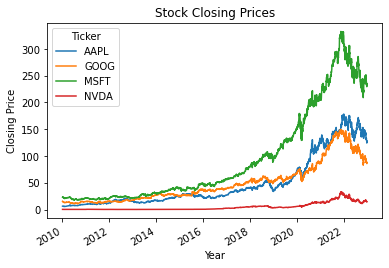

In [8]:
stock_data['Close'].plot(title="Stock Closing Prices")
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.show()

```
# Closing Price

The first six months of 2022

```

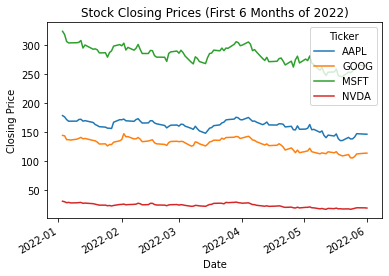

In [9]:
stock_data_2022 = stock_data['Close']['2022-01-01':'2022-06-01']
stock_data_2022.plot(title="Stock Closing Prices (First 6 Months of 2022)")
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

# Volume of Sales


In the stock market, volume refers to the total number of shares of a particular stock that have been traded during a specific period, such as a trading day. It is an important metric for investors and traders because it helps gauge the activity and liquidity of a stock.

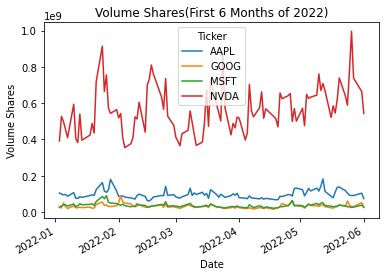

In [10]:
stock_data_2022 = stock_data['Volume']['2022-01-01':'2022-06-01']
#print(stock_data_2023)
stock_data_2022.plot(title="Volume Shares(First 6 Months of 2022)")
plt.xlabel('Date')
plt.ylabel('Volume Shares')
plt.show()

# Moving Average


The moving average (MA) is a widely used statistical calculation in technical analysis to smooth out price data over a specific period of time. It helps traders and analysts identify trends by eliminating short-term fluctuations in stock prices.

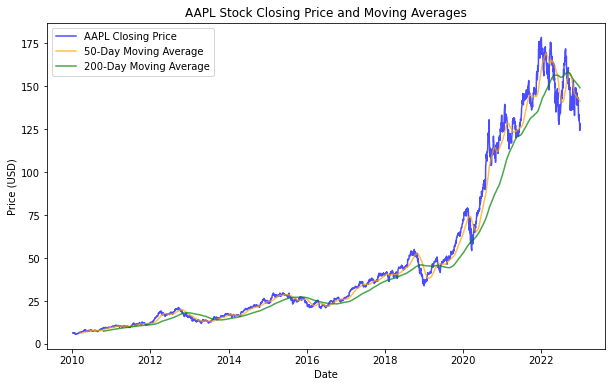

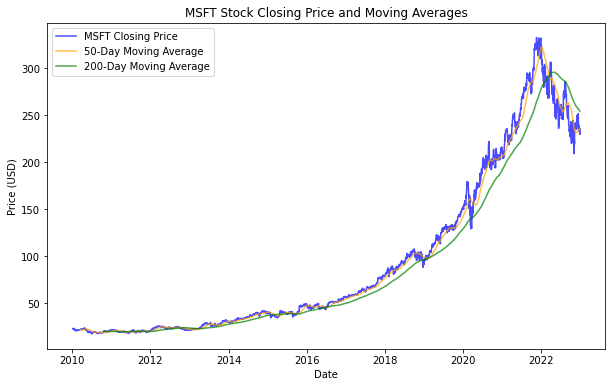

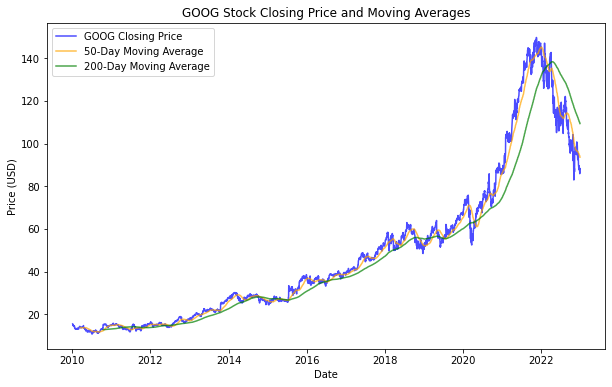

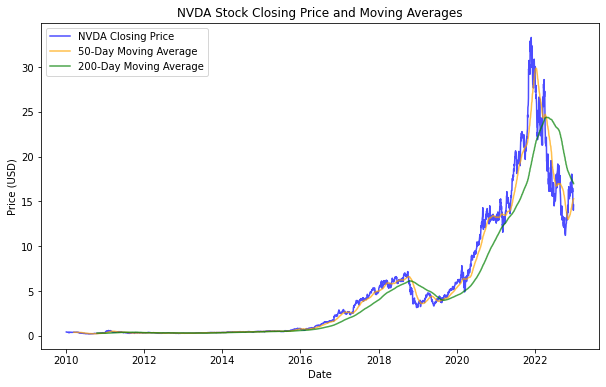

In [11]:
for company in companies:
  company_close =  stock_data['Close'][company]
  ma_50 = company_close.rolling(window=50).mean()
  ma_200 = company_close.rolling(window=200).mean()
  plt.figure(figsize=(10, 6))
  plt.plot(company_close, label=f"{company} Closing Price", color='blue', alpha=0.7)
  plt.plot(ma_50, label="50-Day Moving Average", color='orange', alpha=0.7)
  plt.plot(ma_200, label="200-Day Moving Average", color='green', alpha=0.7)

  plt.title(f"{company} Stock Closing Price and Moving Averages")
  plt.xlabel("Date")
  plt.ylabel("Price (USD)")
  plt.legend()


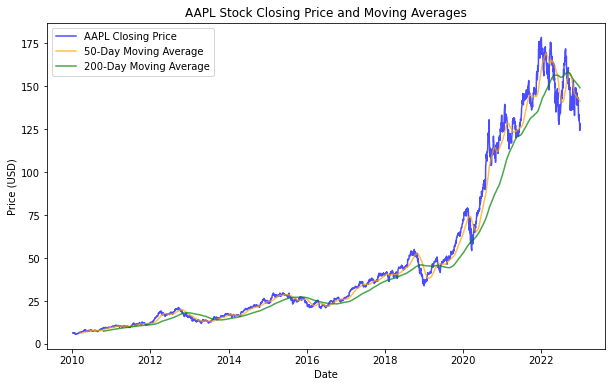

In [12]:
closed_price = stock_data['Close']['AAPL']

mavg_20 = closed_price.rolling(window=50).mean()
mavg_30 = closed_price.rolling(window=200).mean()
mavg_40 = closed_price.rolling(window=40).mean()

plt.figure(figsize=(10, 6))
plt.plot(closed_price, label="AAPL Closing Price", color='blue', alpha=0.7)
plt.plot(mavg_20, label="50-Day Moving Average", color='orange', alpha=0.7)
plt.plot(mavg_30, label="200-Day Moving Average", color='green', alpha=0.7)



plt.title("AAPL Stock Closing Price and Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# Correlation

In [13]:
closing_prices = stock_data['Close']

In [14]:
corr_matrix = closing_prices.corr()
print(corr_matrix)

Ticker      AAPL      GOOG      MSFT      NVDA
Ticker                                        
AAPL    1.000000  0.966344  0.985363  0.963306
GOOG    0.966344  1.000000  0.982018  0.964320
MSFT    0.985363  0.982018  1.000000  0.965277
NVDA    0.963306  0.964320  0.965277  1.000000


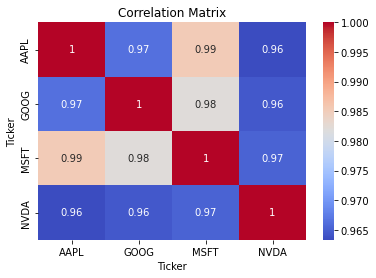

In [15]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Daily Return Of The Stock On Average

In [16]:
daily_returns = closing_prices.pct_change()
average_daily_return = daily_returns.mean()
print("Average Daily Return for each stock:")
print(average_daily_return)

Average Daily Return for each stock:
Ticker
AAPL    0.001079
GOOG    0.000676
MSFT    0.000842
NVDA    0.001474
dtype: float64


# Visualizing the Daily Returns:

* The six first month of 2022

In [17]:
daily_returns = stock_data['Close']['2022-01-01':'2022-06-01'].pct_change()
average_daily_return = daily_returns.mean()
print("Average Daily Return for each stock:")
print(average_daily_return)

Average Daily Return for each stock:
Ticker
AAPL   -0.001690
GOOG   -0.002052
MSFT   -0.001710
NVDA   -0.003898
dtype: float64


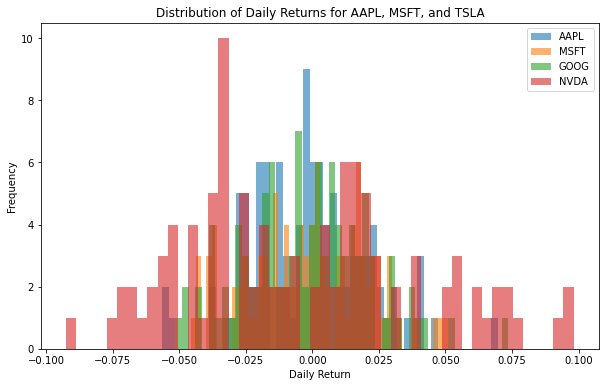

In [18]:
stock_data_2022 = stock_data['Close']['2022-01-01':'2022-06-01']
plt.figure(figsize=(10, 6))
for company in companies:
    plt.hist(daily_returns[company].dropna(), bins=50, alpha=0.6, label=company)

plt.title("Distribution of Daily Returns for AAPL, MSFT, and TSLA")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.legend(loc="upper right")
plt.show()

# Risks

Estimate how much we put at risk by investing in a particular stock

In [80]:
daily_returns = stock_data.pct_change().dropna()
daily_vol = daily_returns.std()
annual_vol = daily_vol * np.sqrt(252)
print(f"Yearly Volatility: {annual_vol}")
confidence_level = 0.05
VaR_95 = daily_returns.quantile(confidence_level)
print(f"Risk: {VaR_95}")

Yearly Volatility: Price   Ticker
Close   AAPL       0.282131
        GOOG       0.265873
        MSFT       0.255381
        NVDA       0.437985
High    AAPL       0.237860
        GOOG       0.230032
        MSFT       0.211858
        NVDA       0.372142
Low     AAPL       0.275775
        GOOG       0.243318
        MSFT       0.226293
        NVDA       0.397534
Open    AAPL       0.293863
        GOOG       0.261852
        MSFT       0.241894
        NVDA       0.442279
Volume  AAPL       5.751325
        GOOG      12.104491
        MSFT       6.320141
        NVDA       6.874718
dtype: float64
Risk: Price   Ticker
Close   AAPL     -0.026797
        GOOG     -0.024933
        MSFT     -0.024292
        NVDA     -0.041436
High    AAPL     -0.021610
        GOOG     -0.021097
        MSFT     -0.019284
        NVDA     -0.033798
Low     AAPL     -0.026962
        GOOG     -0.023518
        MSFT     -0.022181
        NVDA     -0.037978
Open    AAPL     -0.028488
        GOOG     -0

In [82]:
def max_drawdown(series):
    cum_max = series.cummax()
    drawdown = (series - cum_max) / cum_max
    return drawdown.min()

In [83]:
max_loss = stock_data.apply(max_drawdown)
print(f"Pick Loss: {max_loss}")

Pick Loss: Price   Ticker
Close   AAPL     -0.437972
        GOOG     -0.446018
        MSFT     -0.371485
        NVDA     -0.663351
High    AAPL     -0.427341
        GOOG     -0.430966
        MSFT     -0.365545
        NVDA     -0.661027
Low     AAPL     -0.443782
        GOOG     -0.443249
        MSFT     -0.372225
        NVDA     -0.662203
Open    AAPL     -0.441902
        GOOG     -0.436929
        MSFT     -0.364601
        NVDA     -0.672411
Volume  AAPL     -0.981289
        GOOG     -0.999734
        MSFT     -0.976745
        NVDA     -0.986934
dtype: float64


# Model Selection

* ARIMA 
* LSTM

# Perform Stock Test

In [20]:
adf_test = ADFTest(alpha = 0.05)
for company in companies:
    print(adf_test.should_diff(stock_data['Close'][company]))

(0.6956362413561765, True)
(0.6743285749000851, True)
(0.6598035445398367, True)
(0.42660273047287867, True)


In [31]:
#['2022-01-01':'2022-06-01']
#['AAPL', 'MSFT', 'GOOG', 'NVDA']
stock_data['Close']['2022-01-01':'2022-06-01']['AAPL']

Date
2022-01-03    178.443130
2022-01-04    176.178391
2022-01-05    171.492065
2022-01-06    168.629272
2022-01-07    168.795959
                 ...    
2022-05-25    138.144440
2022-05-26    141.349304
2022-05-27    147.110229
2022-05-31    146.323776
2022-06-01    146.195953
Name: AAPL, Length: 104, dtype: float64

# ARIMA

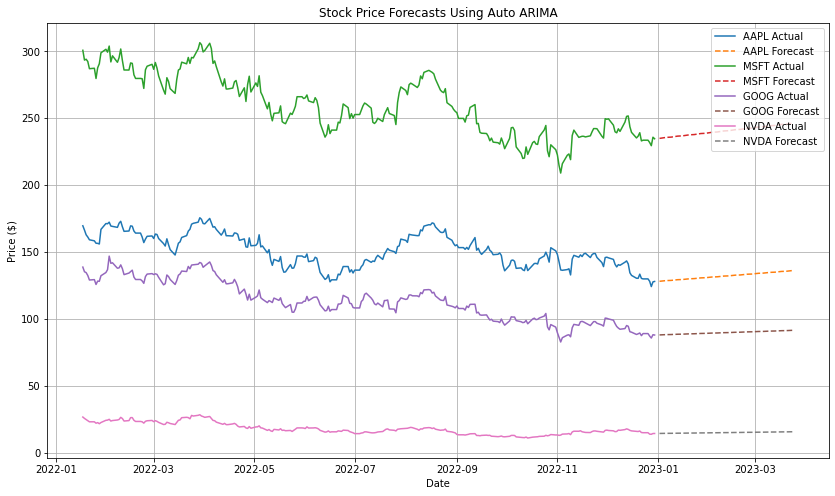

In [57]:
stock_data = stock_data.asfreq('B', method='ffill')

forecast_days = 60
plt.figure(figsize=(14, 8))

for company in companies:
    close = stock_data['Close'][company].dropna()
    
    returns = close.pct_change().dropna()
    
    model = auto_arima(
        returns,
        seasonal=False,
        enforce_stationarity=False,
        enforce_invertibility=False,
        stepwise=True,
        suppress_warnings=True,
        error_action='ignore',
        max_p=3, max_q=3,
        maxiter=100
    )
    
    forecast_returns, conf_int = model.predict(n_periods=forecast_days, return_conf_int=True)
    
    forecast_prices = [close.iloc[-1] * (1 + forecast_returns[0])]
    for r in forecast_returns[1:]:
        forecast_prices.append(forecast_prices[-1] * (1 + r))
    
    forecast_index = pd.date_range(start=close.index[-1], periods=forecast_days+1, freq='B')[1:]    
    plt.plot(close.index[-250:], close[-250:], label=f'{company} Actual')
    plt.plot(forecast_index, forecast_prices, linestyle='--', label=f'{company} Forecast')

plt.title('Stock Price Forecasts Using Auto ARIMA')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

scaler = MinMaxScaler(feature_range=(0,1))

# LSTM

In [67]:
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

21/21 [==============================] - 1s 16ms/step


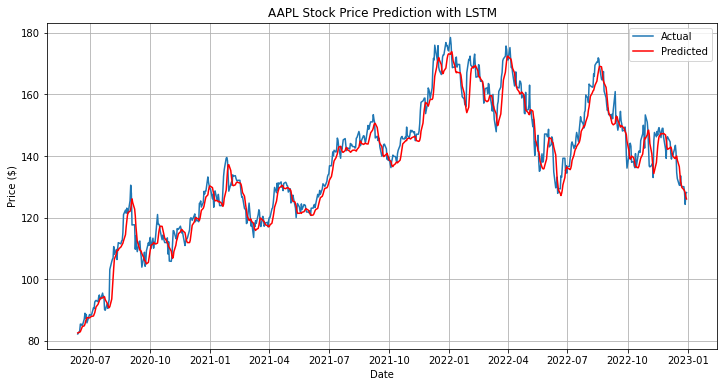

21/21 [==============================] - 2s 14ms/step


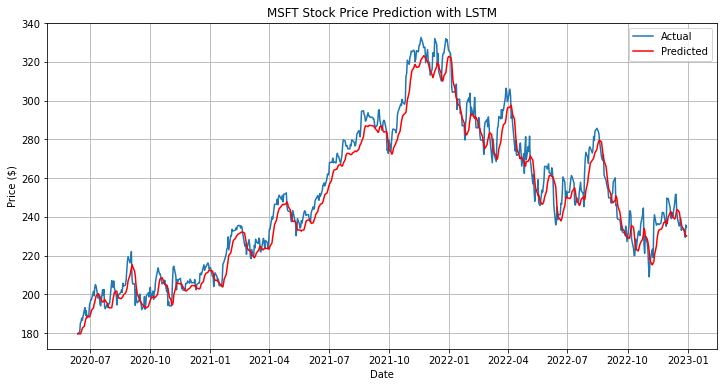

21/21 [==============================] - 1s 12ms/step


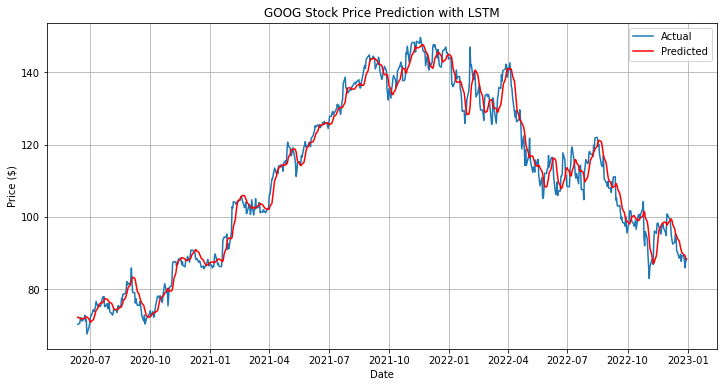

21/21 [==============================] - 1s 14ms/step


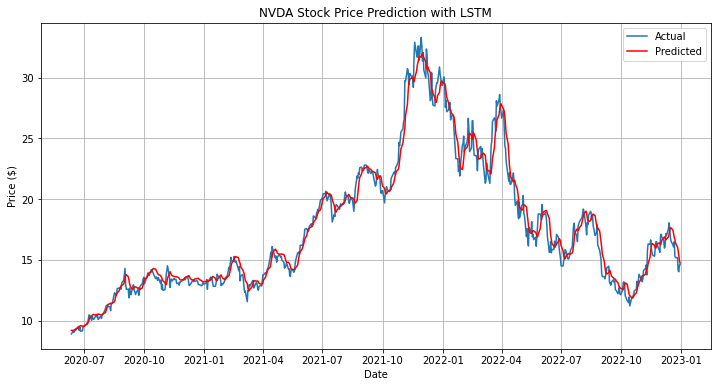

In [77]:
for company in companies:
    close = stock_data['Close'][company]
    scaled_data = scaler.fit_transform(close.values.reshape(-1,1))
    seq_length = 60
    x, y = create_sequences(scaled_data, seq_length)
    train_size = int(len(x)*0.8)
    x_train, x_test = x[:train_size], x[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(25))
    model.add(Dense(1))
    
    model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mean_squared_error'])
    
    early_stop = EarlyStopping(
        monitor = 'val_mean_squared_error',
        patience = 10,
        restore_best_weights = True
    )
    
    history = model.fit(x_train, y_train, batch_size=32, epochs=50,
                        validation_data=(x_test, y_test),callbacks=[early_stop],verbose=0)
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    
    plt.figure(figsize=(12,6))
    plt.plot(close.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1,1)), label='Actual')
    plt.plot(close.index[-len(y_test):], predictions, label='Predicted', color='red')
    plt.title(f'{company} Stock Price Prediction with LSTM')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True)
    plt.show()
